In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [4]:
# Load dataset (replace path if local)
data = pd.read_csv('Mall Customers.csv')


In [5]:
data.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Education                 0
Marital Status            0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

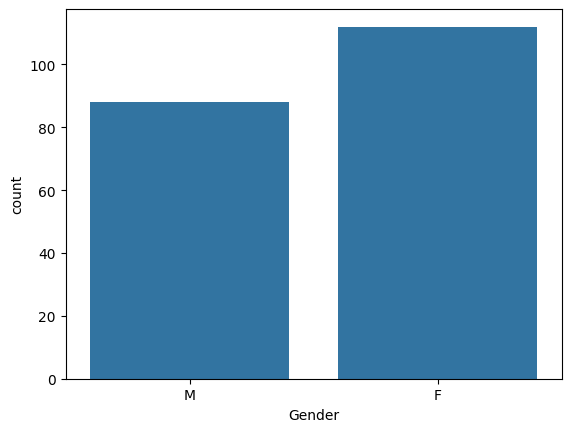

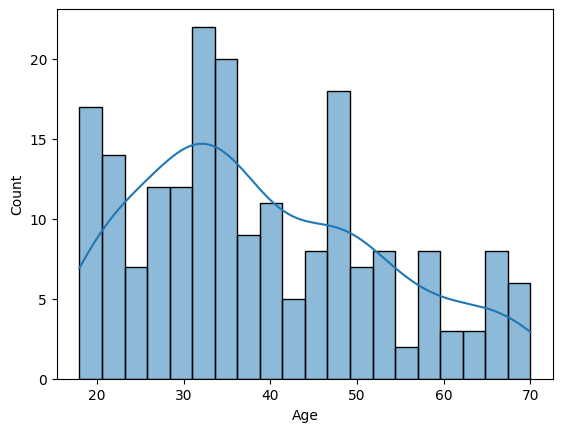

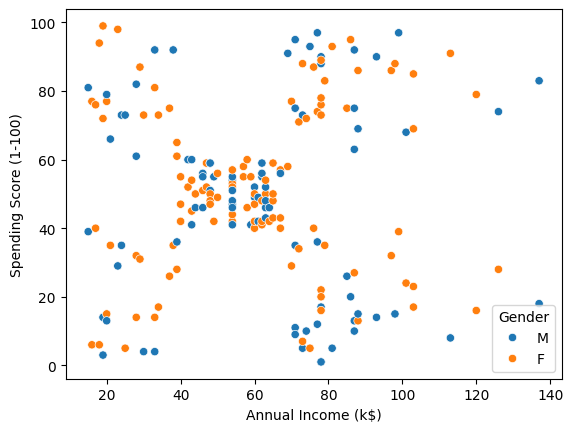

In [9]:
sns.countplot(x='Gender', data=data)
plt.show()

sns.histplot(data['Age'], bins=20, kde=True)
plt.show()

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.show()


In [10]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


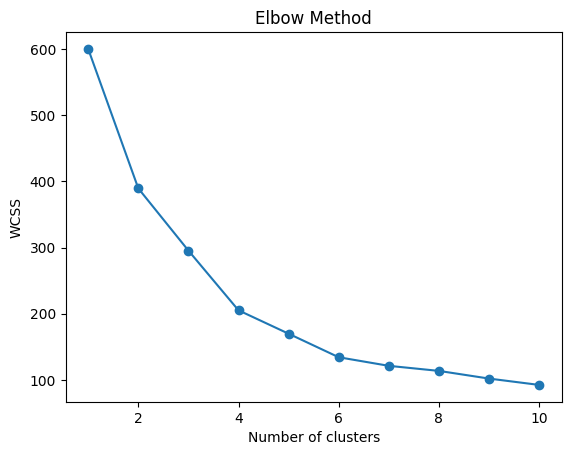

In [11]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [13]:
k = 5  # Choose based on elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data['Cluster'] = clusters


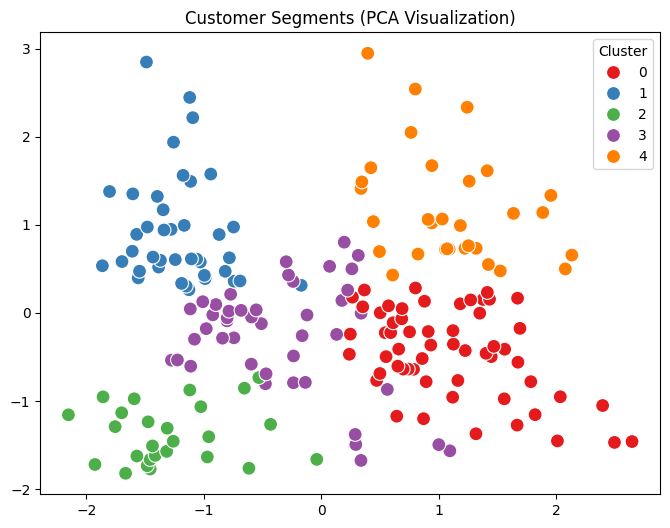

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Cluster'], palette='Set1', s=100)
plt.title("Customer Segments (PCA Visualization)")
plt.show()


In [15]:
cluster_summary = data.groupby('Cluster').agg({
    'Age': ['mean','min','max'],
    'Annual Income (k$)': ['mean','min','max'],
    'Spending Score (1-100)': ['mean','min','max'],
    'Gender': lambda x: x.mode()[0]
}).reset_index()

cluster_summary


Cluster        Age         Annual Income (k$)           \
                mean min max               mean min  max   
0       0  55.275862  40  70          47.620690  19   67   
1       1  32.875000  27  40          86.100000  69  137   
2       2  25.769231  18  35          26.115385  15   42   
3       3  26.733333  18  40          54.311111  16   81   
4       4  44.387097  32  59          89.774194  71  137   

  Spending Score (1-100)           Gender  
                    mean min max <lambda>  
0              41.706897   3  60        F  
1              81.525000  58  97        F  
2              74.846154  39  99        F  
3              40.911111   5  60        F  
4              18.483871   1  39        M